<a href="https://colab.research.google.com/github/AlexeyProvorov/Templates/blob/main/Gradient%20and%20model%20tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt

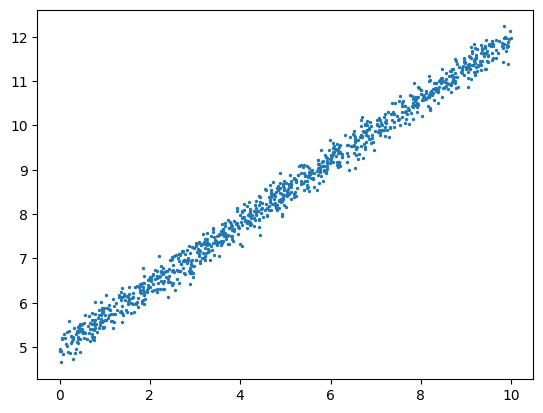

In [107]:
T_P = 1000

x = tf.random.uniform(shape=[T_P], minval=0, maxval=10)
noise = tf.random.normal(shape=[T_P], stddev=0.2)
k_true = 0.7
b_true = 5.0

y = x*k_true + b_true + noise

plt.scatter(x, y, s=2)
plt.show()

In [148]:
k = tf.Variable(0.0)
b = tf.Variable(0.0)

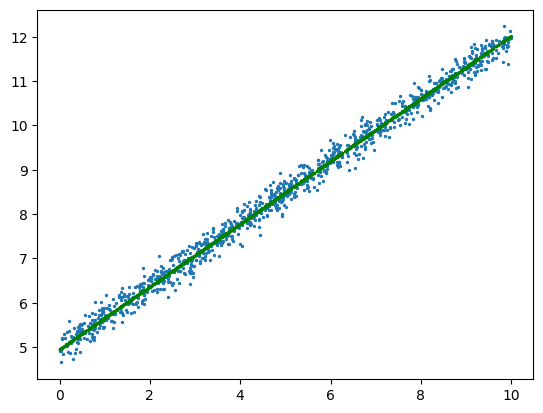

In [149]:
EPOCHS = 500
learning_rate = 0.02

for n in range(EPOCHS):
    with tf.GradientTape() as t:
        f = k *x + b
        loss = tf.reduce_mean(tf.square(y - f))

    dk, db = t.gradient(loss, [k, b])
    k.assign_sub(learning_rate * dk)
    b.assign_sub(learning_rate * db)

y_pr  = k*x+b
# print(k*x+b)
plt.scatter(x, y , s=2)
plt.scatter(x, y_pr ,c='g', s=2)
plt.show()




In [162]:
class DenseNN(tf.Module):
    def __init__(self, outputs):
        super().__init__()
        self.outputs = outputs
        self.fl_init = False

    def __call__(self, x):
        if not self.fl_init:
            self.w = tf.random.truncated_normal((x.shape[-1], self.outputs), stddev=0.1, name='w')
            self.b = tf.zeros([self.outputs], dtype=tf.float32, name ='b')

            self.w = tf.Variable(self.w)
            self.b = tf.Variable(self.b)

            self.fl_init = True

        y = x @ self.w + self.b
        return y

model = DenseNN(1)

print(model(tf.constant([[1.0, 2.0]])))










tf.Tensor([[0.20031373]], shape=(1, 1), dtype=float32)


In [163]:
x_train = tf.random.uniform(shape=[100, 2], minval=0, maxval=10)
y_train = [a+b for a, b in x_train]

In [166]:
loss = lambda x, y: tf.reduce_mean(tf.square(x-y))
opt = tf.optimizers.Adam(learning_rate = 0.01)

In [167]:
EPOCHS = 50
for n in range(EPOCHS):
    for x , y in zip(x_train, y_train):
        x = tf.expand_dims(x, axis = 0)
        y = tf.constant(y, shape=(1,1))


        with tf.GradientTape() as tape:
            f_loss = loss(y, model(x))
        grads = tape.gradient(f_loss, model.trainable_variables)
        opt.apply_gradients(zip(grads, model.trainable_variables))

    print(f_loss.numpy())
print(model.trainable_variables)

22.400114
0.8020282
0.06195189
0.04316852
0.04306119
0.042726602
0.041639153
0.03974741
0.03713197
0.0339561
0.030423792
0.026736561
0.023072539
0.019572068
0.01633625
0.013427515
0.010877401
0.008691167
0.006854088
0.0053377687
0.0041071326
0.0031231684
0.002346986
0.0017421829
0.001276795
0.00092295953
0.0006570434
0.00045998162
0.0003161053
0.00021273666
0.00013986646
8.9626454e-05
5.5888377e-05
3.3842298e-05
1.986057e-05
1.12818125e-05
6.2003173e-06
3.2901917e-06
1.6797285e-06
8.225479e-07
3.9019596e-07
1.744811e-07
7.491417e-08
3.0458068e-08
1.14087015e-08
4.0827217e-09
1.3833414e-09
3.6379788e-10
1.3096724e-10
3.274181e-11
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.3845638e-05], dtype=float32)>, <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.9999986 ],
       [0.99999887]], dtype=float32)>)


In [168]:
print(model(tf.constant([[11.0, 20.0]])))

tf.Tensor([[30.999975]], shape=(1, 1), dtype=float32)
